In this notebook, we will train the following algorithms on our cleaned data, Data.csv, and compare their performance to create a model that predicts bacterial beach water pollution:

- Logistic Regression
- Naive Bayes
- Decision Trees
- Random Forests

At the end we will compare models' performances to the baseline created by scikit-learn's dummy classifier.

# 1. Loading and preparing data for training 

In [1]:
#importing libraries to load and manipulate the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#importing libraries for trainining and testing algorithms on our data
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score ,confusion_matrix, f1_score, classification_report, roc_auc_score

import pickle #we will save our final model using the pickle library

In [2]:
data = pd.read_csv('Data.csv') #loading data

In [3]:
data.head()

,SPLocation,Beach Number,County,County Number,Region Number,Date,Year,Month,Day,DayofYear,...,Precipitation1d,Precipitation2d,Precipitation3d,Precipitation4d,Precipitation5d,Precipitation6d,Precipitation7d,Population,DaysSinceStorm,SeasonalPopulation
0,BEACH DRIVE,44,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
1,BECKRICH RD,45,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
2,BID-A-WEE BEACH,46,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
3,CARL GRAY PARK,47,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
4,DELWOOD,48,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170521 entries, 0 to 170520
Data columns (total 37 columns):
SPLocation            170521 non-null object
Beach Number          170521 non-null int64
County                170521 non-null object
County Number         170521 non-null int64
Region Number         170521 non-null int64
Date                  170521 non-null object
Year                  170521 non-null int64
Month                 170521 non-null int64
Day                   170521 non-null int64
DayofYear             170521 non-null int64
Weather               170521 non-null float64
WaterTemp             170521 non-null float64
AirTemp               170521 non-null float64
RainFall24h           170521 non-null float64
RainFall3d            170521 non-null float64
RainLastWeek          170521 non-null float64
enterococcus          170521 non-null int64
Pollution             170521 non-null int64
Precipitation         170521 non-null float64
MaxTemp               170521 non-nul

In [5]:
data.describe()

,Beach Number,County Number,Region Number,Year,Month,Day,DayofYear,Weather,WaterTemp,AirTemp,...,Precipitation1d,Precipitation2d,Precipitation3d,Precipitation4d,Precipitation5d,Precipitation6d,Precipitation7d,Population,DaysSinceStorm,SeasonalPopulation
count,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,...,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,170521.000000,1.705210e+05,170521.000000,1.705210e+05
mean,147.998557,18.688126,2.208813,2008.352391,6.563098,15.691756,212.584690,1.331326,75.523298,75.876831,...,0.157194,0.155051,0.158397,0.153510,0.157871,0.162634,0.150272,6.316686e+05,-0.511497,8.504269e+05
std,81.760453,9.354731,0.923143,4.552705,3.380557,8.794727,101.749606,0.539115,10.064535,11.570700,...,0.469371,0.475809,0.497689,0.474043,0.475353,0.496810,0.445077,7.042099e+05,2.259927,1.045847e+06
min,1.000000,1.000000,1.000000,2000.000000,1.000000,1.000000,31.000000,1.000000,20.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.829000e+03,-1.000000,9.829000e+03
25%,83.000000,15.000000,2.000000,2004.000000,4.000000,8.000000,126.000000,1.000000,70.000000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.526376e+05,-1.000000,1.636482e+05
50%,148.000000,21.000000,2.000000,2008.000000,7.000000,16.000000,216.000000,1.000000,77.000000,78.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.366584e+05,-1.000000,3.927396e+05
75%,215.000000,25.000000,3.000000,2012.000000,9.000000,23.000000,299.000000,2.000000,83.000000,84.000000,...,0.070000,0.070000,0.070000,0.060000,0.070000,0.070000,0.060000,9.175326e+05,-1.000000,1.130788e+06
max,293.000000,35.000000,4.000000,2017.000000,12.000000,31.000000,391.000000,3.000000,1010.000000,896.750000,...,12.000000,15.430000,10.640000,12.100000,12.110000,12.000000,15.430000,2.666294e+06,15.000000,5.332588e+06


In [6]:
data.columns

Index(['SPLocation', 'Beach Number', 'County', 'County Number',
       'Region Number', 'Date', 'Year', 'Month', 'Day', 'DayofYear', 'Weather',
       'WaterTemp', 'AirTemp', 'RainFall24h', 'RainFall3d', 'RainLastWeek',
       'enterococcus', 'Pollution', 'Precipitation', 'MaxTemp', 'MaxTemp1d',
       'MaxTemp2d', 'MaxTemp3d', 'MaxTemp4d', 'MaxTemp5d', 'MaxTemp6d',
       'MaxTemp7d', 'Precipitation1d', 'Precipitation2d', 'Precipitation3d',
       'Precipitation4d', 'Precipitation5d', 'Precipitation6d',
       'Precipitation7d', 'Population', 'DaysSinceStorm',
       'SeasonalPopulation'],
      dtype='object')

Since mostly clean beaches make it harder for our algorithms to learn pollution, we will remove beaches that are polluted in less than 3% of the tests.
We will also remove beaches that have a number of tests less than 500 because those beaches are not sampled enough to support a pattern in out dataframe.

In [7]:
#Now, for each beach in our dataset, we create two lists pr_list and n_list
#pr_list will record the pollution rate of each beach
#n_list will record the number of tests on each beach
beach_list = data.SPLocation.unique().tolist() #the list of beaches as beach_list
pr_list = [] #creating pr_list empty
n_list = [] #creating n_list empty
for b in beach_list: #for each beach in the beach_list
    pr = data[data['SPLocation'] == b].Pollution.mean() #pr is the pollution rate of the beach
    n = len(data[data['SPLocation'] == b]) #n is the number of test on the beach
    pr_list.append(pr) #add p to the pr_list
    n_list.append(n) #add n to the n_list

In [8]:
#Looks like the lists have same length, so we did nothing wrong
print(len(beach_list), len(pr_list),len(n_list))

291 291 291


In [9]:
def pr(b): #a function that assigns each beach b with its pollution rate
    return pr_list[beach_list.index(b)]
def n(b): #a function that assigns each beach b with its number of tests
    return n_list[beach_list.index(b)]

In [10]:
data['PR'] = data['SPLocation'].apply(pr) #we add a column named PR that records the number of pollution events
data['NumTests'] = data['SPLocation'].apply(n) #we add a column named NumTests that records the number of tests

In [11]:
pr_treshold = 0.03 #set a treshold for pollution rate as mentioned above
n_treshold = 500 #set a treshold for number of tests

In [12]:
#Now we will slice our dataframe to work with the beaches that have
#1) a pollution rate greater than the pr_treshold = .03, and
#2) a number of tests greater than or equal the n_treshold = 500
df = data[(data.PR >= pr_treshold) & (data.NumTests >= n_treshold)].drop(['PR', 'NumTests'],axis=1)

In [13]:
df.SPLocation.value_counts()

SOUTH BEACH PARK                     1473
NORTH SHORE OCEAN TERRACE             878
VENICE BEACH                          866
SIESTA KEY BEACH                      864
COLLINS PARK - 21ST ST                857
53RD ST - MIAMI BEACH                 853
BEN T. DAVIS NORTH                    841
LIDO CASINO BEACH                     840
TURTLE BEACH                          839
HAULOVER BEACH                        836
DOG BEACH                             834
NORTH JETTY BEACH                     834
NOKOMIS BEACH                         832
SURFSIDE BEACH - 93RD ST              830
KEY BISCAYNE BEACH                    830
SANDERS BEACH                         829
CAPE CORAL YACHT CLUB                 828
BAHIA BEACH                           827
GOLDEN BEACH                          827
PICNIC ISLAND NORTH                   825
NORTH LIDO BEACH                      821
DAVIS ISLAND BEACH                    821
LIGHTHOUSE BEACH                      819
BOWDITCH PARK                     

In [14]:
#After slicing we are left with 94063 samples in our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94063 entries, 0 to 170520
Data columns (total 37 columns):
SPLocation            94063 non-null object
Beach Number          94063 non-null int64
County                94063 non-null object
County Number         94063 non-null int64
Region Number         94063 non-null int64
Date                  94063 non-null object
Year                  94063 non-null int64
Month                 94063 non-null int64
Day                   94063 non-null int64
DayofYear             94063 non-null int64
Weather               94063 non-null float64
WaterTemp             94063 non-null float64
AirTemp               94063 non-null float64
RainFall24h           94063 non-null float64
RainFall3d            94063 non-null float64
RainLastWeek          94063 non-null float64
enterococcus          94063 non-null int64
Pollution             94063 non-null int64
Precipitation         94063 non-null float64
MaxTemp               94063 non-null float64
MaxTemp1d  

In [15]:
#The total number of beaches in our dataframe is
df['SPLocation'].nunique()

137

In [16]:
#The total number of counties in our dataframe is
df['County'].nunique()

26

In [17]:
#Moreover, the ratio of pollution events in our dataframe is
df.Pollution.sum()/len(df)

0.08220022750709631

Notice that the last line show the imbalance in the data. Only 8.2% of our data labelled with Pollution =1.

In [18]:
#Now we choose a subset of columns in the dataframe df that will be our features or our target (Pollution)
df = df[['Beach Number', 'WaterTemp', 'AirTemp', 'RainFall24h', 'RainFall3d', 'RainLastWeek', 
         'DayofYear', 'Pollution', 'MaxTemp1d', 'MaxTemp4d', 'MaxTemp7d', 'SeasonalPopulation']]

In [19]:
#creating the correlation matrix for the columns in the dataset
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Beach Number,WaterTemp,AirTemp,RainFall24h,RainFall3d,RainLastWeek,DayofYear,Pollution,MaxTemp1d,MaxTemp4d,MaxTemp7d,SeasonalPopulation
Beach Number,1,0.0733923,0.0751673,0.00439147,-0.00212883,-0.00400563,-0.0016668,-0.0805212,0.140647,0.151282,0.148321,0.405087
WaterTemp,0.0733923,1,0.865425,0.0749531,0.0264403,0.111523,0.279005,0.0355837,0.717308,0.691952,0.68574,0.224136
AirTemp,0.0751673,0.865425,1,0.0573833,0.0203298,0.0893438,0.216211,0.0293013,0.700769,0.636663,0.634518,0.235501
RainFall24h,0.00439147,0.0749531,0.0573833,1,0.112067,0.220707,0.0179307,0.0867147,0.0686453,0.0835311,0.0780913,0.0349859
RainFall3d,-0.00212883,0.0264403,0.0203298,0.112067,1,0.126076,0.00635756,0.0249806,0.0126526,0.0263478,0.0256818,0.0172246
RainLastWeek,-0.00400563,0.111523,0.0893438,0.220707,0.126076,1,0.0602967,0.0710189,0.0671166,0.0967404,0.119269,0.0868611
DayofYear,-0.0016668,0.279005,0.216211,0.0179307,0.00635756,0.0602967,1,0.00550186,0.22437,0.283988,0.306307,0.0603299
Pollution,-0.0805212,0.0355837,0.0293013,0.0867147,0.0249806,0.0710189,0.00550186,1,0.026789,0.0243137,0.0215319,-0.0216894
MaxTemp1d,0.140647,0.717308,0.700769,0.0686453,0.0126526,0.0671166,0.22437,0.026789,1,0.763379,0.748653,0.202743
MaxTemp4d,0.151282,0.691952,0.636663,0.0835311,0.0263478,0.0967404,0.283988,0.0243137,0.763379,1,0.771097,0.2046


# 2. Cross validation function

In this part we are going to define a cross validation function to evaluate cross-validation performance of a model on the training set Xtrain, ytrain.

In [20]:
def init_scores(): #creating a dictionary that stores performance scores
    
    global scores 
    scores = {}
    scores['f1_score'] = []
    scores['precision'] = []
    scores['recall'] = []
    scores['accuracy'] = []
    
    return scores

def evaluation(Xtest,ytest,cls): #a function that stores performance scores
    global scores
    ypred = cls.predict(Xtest)
    C = confusion_matrix(ytest,ypred)
    TN = C[0][0]
    FN = C[1][0]
    TP = C[1][1]
    FP = C[0][1]

    #print('f1_score: {:0.3f}'.format(f1_score(ytest,ypred)))
    scores['f1_score'].append(f1_score(ytest,ypred))
    #print('precision: {:0.3f}'.format(TP/(TP+FP)))
    scores['precision'].append(TP/(TP+FP))
    #print('recall: {:0.3f}'.format(TP/(TP+FN)))
    scores['recall'].append(TP/(TP+FN))
    #print('accuracy: {:0.3f}'.format(accuracy_score(ytest,ypred)))
    scores['accuracy'].append(accuracy_score(ytest,ypred))
        
def cv(Xtrain,ytrain,model): #cross-validation function
    global scores
    scores = init_scores()
    skf = StratifiedKFold(n_splits=5) #we apply stratified k-fold to have balanced partirions of training data
    n = 0
    for train_index, test_index in skf.split(Xtrain,ytrain):
        #print('cross_validate_run: {}'.format(n))
        Xtr, Xte = Xtrain[train_index], Xtrain[test_index]
        ytr, yte = ytrain[train_index], ytrain[test_index]
        cls = model.fit(Xtr, ytr)
        evaluation(Xte,yte,cls)
        n += 1
    
    print('\nMean scores +/- sd:\n')
    for k in scores:
        print('{} : {:0.3f} +/- {:0.3f}'.format(k, np.array(scores[k]).mean(),  np.array(scores[k]).std()))
        
    #return scores

This function runs 5-fold stratified cross validation on the training set and stores/prints out the averages of f1-score, accuracy, recall (for pollution), and precision (for pollution). 

# 3. Logistic Regression

Now we train the logistic regression (LR) algorithm on our data and evaluate its performance. Our dataframe contains a categorical feature, namely Beach Number. We first turn Beach Numbers in to one-hot form, using pandas' get_dummies, since categorical data negatively affects LR's performance.

In [21]:
location = pd.get_dummies(df['Beach Number'], drop_first = True)
#created a one-hot dataframe for beaches (or Beach Numbers)
df_onehot = pd.concat([df,location], axis = 1).drop(['Beach Number'], axis = 1)
#removing Beach Number from our data while adding the one-hot encoding

Now we create X (features) and y (target) to train and test our algorithm.

In [22]:
X_onehot = df_onehot.drop(['Pollution'],axis=1)
y_onehot = df_onehot['Pollution']
#splitting X and y into train-test with 80-20 ratio
X_onehot_train,X_onehot_test,y_onehot_train,y_onehot_test = train_test_split(X_onehot.values,y_onehot.values,test_size = 0.2,stratify = y_onehot)

Next we run 5-fold cross validation on the training set with logistic regression to determine the best hyperparameters for this training task. We will set class_weight = 'balanced' to overcome the imbalance in the data (only 8% pollution).

First we try LR with L2-regularization and various C values.

In [23]:
for c in [10,1,0.1,0.01, 0.001]:
    logmodel = LogisticRegression(penalty = 'l2', C = c, class_weight = 'balanced', solver = 'liblinear')
    #with 'l2' regularization and class_weight
    print('\n-----L2-regularization and C = {}-----'.format(c))
    cv(X_onehot_train,y_onehot_train,logmodel)


-----L2-regularization and C = 10-----

Mean scores +/- sd:

f1_score : 0.185 +/- 0.010
precision : 0.112 +/- 0.009
recall : 0.535 +/- 0.035
accuracy : 0.608 +/- 0.054

-----L2-regularization and C = 1-----

Mean scores +/- sd:

f1_score : 0.185 +/- 0.010
precision : 0.113 +/- 0.010
recall : 0.519 +/- 0.051
accuracy : 0.620 +/- 0.065

-----L2-regularization and C = 0.1-----

Mean scores +/- sd:

f1_score : 0.185 +/- 0.011
precision : 0.114 +/- 0.010
recall : 0.520 +/- 0.050
accuracy : 0.620 +/- 0.065

-----L2-regularization and C = 0.01-----

Mean scores +/- sd:

f1_score : 0.185 +/- 0.010
precision : 0.113 +/- 0.009
recall : 0.519 +/- 0.051
accuracy : 0.620 +/- 0.064

-----L2-regularization and C = 0.001-----

Mean scores +/- sd:

f1_score : 0.185 +/- 0.007
precision : 0.113 +/- 0.007
recall : 0.516 +/- 0.052
accuracy : 0.624 +/- 0.053


Now let us try LR with L1-regularization and various C values.

In [24]:
for c in [10,1,0.1,0.01, 0.001]:
    logmodel = LogisticRegression(penalty = 'l1', C = c, class_weight = 'balanced', solver = 'liblinear')
    #with 'l1' regularization and class_weight
    print('\n-----L1-regularization and C = {}-----'.format(c))
    cv(X_onehot_train,y_onehot_train, logmodel)


-----L1-regularization and C = 10-----

Mean scores +/- sd:

f1_score : 0.244 +/- 0.006
precision : 0.153 +/- 0.004
recall : 0.604 +/- 0.013
accuracy : 0.692 +/- 0.005

-----L1-regularization and C = 1-----

Mean scores +/- sd:

f1_score : 0.243 +/- 0.005
precision : 0.152 +/- 0.003
recall : 0.606 +/- 0.013
accuracy : 0.689 +/- 0.004

-----L1-regularization and C = 0.1-----

Mean scores +/- sd:

f1_score : 0.240 +/- 0.005
precision : 0.152 +/- 0.003
recall : 0.579 +/- 0.012
accuracy : 0.699 +/- 0.004

-----L1-regularization and C = 0.01-----

Mean scores +/- sd:

f1_score : 0.232 +/- 0.003
precision : 0.152 +/- 0.002
recall : 0.483 +/- 0.007
accuracy : 0.737 +/- 0.003

-----L1-regularization and C = 0.001-----

Mean scores +/- sd:

f1_score : 0.192 +/- 0.003
precision : 0.122 +/- 0.002
recall : 0.456 +/- 0.017
accuracy : 0.685 +/- 0.009


After comparing L1 vs L2 regularizations, we see that best performance was obtained with L1-regularization and C = 1. Therefore, we train LR algorithm with these parameters on our training set and evaluate on the test set for final performance report.

In [25]:
logmodel = LogisticRegression(penalty = 'l1', C = 1, class_weight = 'balanced', solver = 'liblinear')
logmodel.fit(X_onehot_train,y_onehot_train)
pred = logmodel.predict(X_onehot_test) #yielding predictions of the trained model on the test data 
print(classification_report(y_onehot_test,pred)) #printing recall, precision, etc. values

              precision    recall  f1-score   support

           0       0.95      0.70      0.81     17267
           1       0.15      0.62      0.25      1546

    accuracy                           0.69     18813
   macro avg       0.55      0.66      0.53     18813
weighted avg       0.89      0.69      0.76     18813



# 4. Naive Bayes Classifier

In this part we train Naive Bayes classifier (NBC) on our data. Since NBC does not work with categorical features, we will train our data on the one-hot encoding of the features (X_onehot_train,y_onehot_train), which are defined above.

In [26]:
for a in [10,1,0.1,0.01, 0.001]:
    NBmodel = ComplementNB(alpha = a)
    print('\n----Performance with alpha = {}-----'.format(a))
    cv(X_onehot_train,y_onehot_train, NBmodel)


----Performance with alpha = 10-----

Mean scores +/- sd:

f1_score : 0.156 +/- 0.001
precision : 0.087 +/- 0.001
recall : 0.709 +/- 0.009
accuracy : 0.368 +/- 0.004

----Performance with alpha = 1-----

Mean scores +/- sd:

f1_score : 0.156 +/- 0.001
precision : 0.087 +/- 0.001
recall : 0.708 +/- 0.009
accuracy : 0.369 +/- 0.004

----Performance with alpha = 0.1-----

Mean scores +/- sd:

f1_score : 0.156 +/- 0.001
precision : 0.087 +/- 0.001
recall : 0.708 +/- 0.009
accuracy : 0.369 +/- 0.004

----Performance with alpha = 0.01-----

Mean scores +/- sd:

f1_score : 0.156 +/- 0.001
precision : 0.087 +/- 0.001
recall : 0.708 +/- 0.009
accuracy : 0.369 +/- 0.004

----Performance with alpha = 0.001-----

Mean scores +/- sd:

f1_score : 0.156 +/- 0.001
precision : 0.087 +/- 0.001
recall : 0.708 +/- 0.009
accuracy : 0.369 +/- 0.004


Looks like different alpha values do not affect the performance of the NBC. So we train NBC on our training set with alpha = 1.

In [27]:
NBmodel=ComplementNB(alpha = 1)
NBmodel.fit(X_onehot_train,y_onehot_train)
pred = NBmodel.predict(X_onehot_test)
print(classification_report(y_onehot_test,pred)) #printing recall, precision, etc. values

              precision    recall  f1-score   support

           0       0.93      0.34      0.50     17267
           1       0.09      0.70      0.15      1546

    accuracy                           0.37     18813
   macro avg       0.51      0.52      0.33     18813
weighted avg       0.86      0.37      0.47     18813



### Naive Bayes classifier performed better than LR on the recall. However, it has lower precision and f1-score on pollution.

# 5. Decision Trees

In this part we train the Decision Tree Classifier on our data. Categorical features do not affect the performance of Decision. Therefore, we will not apply one hot encoding to the Beach Number feature.

So we create our features, X, and target, y, differently.

In [28]:
X = df.drop(['Pollution'],axis=1)
y = df['Pollution']

Xtrain,Xtest,ytrain,ytest = train_test_split(X.values,y.values,test_size = 0.2,stratify = y,random_state =40)

In [29]:
tree = DecisionTreeClassifier()
cv(Xtrain,ytrain,tree)


Mean scores +/- sd:

f1_score : 0.301 +/- 0.013
precision : 0.284 +/- 0.010
recall : 0.320 +/- 0.017
accuracy : 0.878 +/- 0.001


In [30]:
tree = DecisionTreeClassifier()
tree.fit(Xtrain,ytrain)
pred = tree.predict(Xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     17267
           1       0.31      0.33      0.32      1546

    accuracy                           0.88     18813
   macro avg       0.62      0.63      0.63     18813
weighted avg       0.89      0.88      0.89     18813



# 6. Random Forests

In this part we will train Random Forests on our data and increase its performance with hyperparameter tuning.

In [31]:
# trying different min_samples_split values 
for p in [2, 5, 10, 12, 14, 20, 30]:
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= p, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:1}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('\n---CV performance for min_samples_split = {}----'.format(p) )
    cv(Xtrain,ytrain,model)


---CV performance for min_samples_split = 2----

Mean scores +/- sd:

f1_score : 0.299 +/- 0.008
precision : 0.453 +/- 0.010
recall : 0.223 +/- 0.008
accuracy : 0.914 +/- 0.001

---CV performance for min_samples_split = 5----

Mean scores +/- sd:

f1_score : 0.263 +/- 0.010
precision : 0.547 +/- 0.018
recall : 0.173 +/- 0.008
accuracy : 0.920 +/- 0.001

---CV performance for min_samples_split = 10----

Mean scores +/- sd:

f1_score : 0.209 +/- 0.014
precision : 0.597 +/- 0.038
recall : 0.127 +/- 0.010
accuracy : 0.921 +/- 0.001

---CV performance for min_samples_split = 12----

Mean scores +/- sd:

f1_score : 0.193 +/- 0.011
precision : 0.608 +/- 0.024
recall : 0.114 +/- 0.007
accuracy : 0.921 +/- 0.001

---CV performance for min_samples_split = 14----

Mean scores +/- sd:

f1_score : 0.173 +/- 0.010
precision : 0.615 +/- 0.025
recall : 0.101 +/- 0.007
accuracy : 0.921 +/- 0.001

---CV performance for min_samples_split = 20----

Mean scores +/- sd:

f1_score : 0.132 +/- 0.012
precisio

In [32]:
# trying different min_samples_split values with class_weight = {0:1,1:200}
for p in [5, 10, 12, 14, 20, 30, 50]:
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= p, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:200}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('\n---CV performance for min_samples_split = {}----'.format(p) )
    cv(Xtrain,ytrain,model)


---CV performance for min_samples_split = 5----

Mean scores +/- sd:

f1_score : 0.328 +/- 0.011
precision : 0.425 +/- 0.007
recall : 0.268 +/- 0.012
accuracy : 0.910 +/- 0.001

---CV performance for min_samples_split = 10----

Mean scores +/- sd:

f1_score : 0.354 +/- 0.011
precision : 0.371 +/- 0.009
recall : 0.338 +/- 0.014
accuracy : 0.899 +/- 0.001

---CV performance for min_samples_split = 12----

Mean scores +/- sd:

f1_score : 0.361 +/- 0.005
precision : 0.360 +/- 0.004
recall : 0.363 +/- 0.007
accuracy : 0.894 +/- 0.001

---CV performance for min_samples_split = 14----

Mean scores +/- sd:

f1_score : 0.363 +/- 0.011
precision : 0.344 +/- 0.009
recall : 0.384 +/- 0.014
accuracy : 0.889 +/- 0.002

---CV performance for min_samples_split = 20----

Mean scores +/- sd:

f1_score : 0.365 +/- 0.006
precision : 0.315 +/- 0.007
recall : 0.433 +/- 0.008
accuracy : 0.876 +/- 0.002

---CV performance for min_samples_split = 30----

Mean scores +/- sd:

f1_score : 0.352 +/- 0.005
precisi

In [33]:
# trying different min_samples_leaf values with class_weight={0:1,1:300} and min_samples_split= 24
for p in [1,2,3,4,5,8]: 
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 24, min_samples_leaf=p, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:300}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('\n---CV performance for min_samples_leaf = {}----'.format(p) )
    cv(Xtrain,ytrain,model)


---CV performance for min_samples_leaf = 1----

Mean scores +/- sd:

f1_score : 0.358 +/- 0.003
precision : 0.290 +/- 0.003
recall : 0.467 +/- 0.006
accuracy : 0.862 +/- 0.002

---CV performance for min_samples_leaf = 2----

Mean scores +/- sd:

f1_score : 0.360 +/- 0.006
precision : 0.285 +/- 0.006
recall : 0.490 +/- 0.009
accuracy : 0.857 +/- 0.003

---CV performance for min_samples_leaf = 3----

Mean scores +/- sd:

f1_score : 0.358 +/- 0.004
precision : 0.275 +/- 0.002
recall : 0.513 +/- 0.007
accuracy : 0.849 +/- 0.001

---CV performance for min_samples_leaf = 4----

Mean scores +/- sd:

f1_score : 0.357 +/- 0.005
precision : 0.269 +/- 0.004
recall : 0.532 +/- 0.007
accuracy : 0.843 +/- 0.002

---CV performance for min_samples_leaf = 5----

Mean scores +/- sd:

f1_score : 0.351 +/- 0.003
precision : 0.259 +/- 0.003
recall : 0.546 +/- 0.007
accuracy : 0.834 +/- 0.002

---CV performance for min_samples_leaf = 8----

Mean scores +/- sd:

f1_score : 0.336 +/- 0.002
precision : 0.234 

In [34]:
# trying different min_samples_split values with class_weight={0:1,1:300} and min_samples_leaf= 8
for p in [20,21,22,23,24]:
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= p, min_samples_leaf=8, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:300}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('\n---CV performance for min_samples_split = {}----'.format(p) )
    cv(Xtrain,ytrain,model)


---CV performance for min_samples_split = 20----

Mean scores +/- sd:

f1_score : 0.346 +/- 0.002
precision : 0.248 +/- 0.002
recall : 0.570 +/- 0.007
accuracy : 0.823 +/- 0.002

---CV performance for min_samples_split = 21----

Mean scores +/- sd:

f1_score : 0.343 +/- 0.002
precision : 0.244 +/- 0.002
recall : 0.578 +/- 0.005
accuracy : 0.818 +/- 0.001

---CV performance for min_samples_split = 22----

Mean scores +/- sd:

f1_score : 0.344 +/- 0.005
precision : 0.244 +/- 0.004
recall : 0.584 +/- 0.006
accuracy : 0.817 +/- 0.003

---CV performance for min_samples_split = 23----

Mean scores +/- sd:

f1_score : 0.341 +/- 0.004
precision : 0.240 +/- 0.003
recall : 0.591 +/- 0.008
accuracy : 0.812 +/- 0.002

---CV performance for min_samples_split = 24----

Mean scores +/- sd:

f1_score : 0.339 +/- 0.003
precision : 0.236 +/- 0.002
recall : 0.601 +/- 0.009
accuracy : 0.807 +/- 0.002


In [35]:
# trying different min_samples_leaf values with class_weight={0:1,1:300} and min_samples_split= 24
for p in [4,5,6,7,8]:
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 24, min_samples_leaf=p, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:250}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('\n---CV performance for min_samples_leaf = {}----'.format(p) )
    cv(Xtrain,ytrain,model)


---CV performance for min_samples_leaf = 4----

Mean scores +/- sd:

f1_score : 0.357 +/- 0.003
precision : 0.270 +/- 0.003
recall : 0.528 +/- 0.006
accuracy : 0.844 +/- 0.001

---CV performance for min_samples_leaf = 5----

Mean scores +/- sd:

f1_score : 0.356 +/- 0.006
precision : 0.264 +/- 0.005
recall : 0.550 +/- 0.009
accuracy : 0.837 +/- 0.002

---CV performance for min_samples_leaf = 6----

Mean scores +/- sd:

f1_score : 0.350 +/- 0.003
precision : 0.254 +/- 0.003
recall : 0.562 +/- 0.007
accuracy : 0.828 +/- 0.002

---CV performance for min_samples_leaf = 7----

Mean scores +/- sd:

f1_score : 0.345 +/- 0.005
precision : 0.245 +/- 0.003
recall : 0.580 +/- 0.011
accuracy : 0.819 +/- 0.002

---CV performance for min_samples_leaf = 8----

Mean scores +/- sd:

f1_score : 0.335 +/- 0.003
precision : 0.234 +/- 0.003
recall : 0.592 +/- 0.006
accuracy : 0.807 +/- 0.002


In [36]:
#trying different class_weights with min_samples_split= 22 and min_samples_leaf=5
for p in [200,250,300,500,750]: 
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 22, min_samples_leaf=5, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:p}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('\n---CV performance for class_weight = 1 to {}----'.format(p) )
    cv(Xtrain,ytrain,model)


---CV performance for class_weight = 1 to 200----

Mean scores +/- sd:

f1_score : 0.362 +/- 0.005
precision : 0.274 +/- 0.004
recall : 0.533 +/- 0.010
accuracy : 0.845 +/- 0.002

---CV performance for class_weight = 1 to 250----

Mean scores +/- sd:

f1_score : 0.357 +/- 0.005
precision : 0.269 +/- 0.004
recall : 0.530 +/- 0.009
accuracy : 0.843 +/- 0.003

---CV performance for class_weight = 1 to 300----

Mean scores +/- sd:

f1_score : 0.358 +/- 0.003
precision : 0.269 +/- 0.003
recall : 0.537 +/- 0.004
accuracy : 0.842 +/- 0.001

---CV performance for class_weight = 1 to 500----

Mean scores +/- sd:

f1_score : 0.354 +/- 0.005
precision : 0.264 +/- 0.004
recall : 0.537 +/- 0.009
accuracy : 0.839 +/- 0.002

---CV performance for class_weight = 1 to 750----

Mean scores +/- sd:

f1_score : 0.355 +/- 0.003
precision : 0.265 +/- 0.003
recall : 0.537 +/- 0.005
accuracy : 0.839 +/- 0.001


In [37]:
#trying different class_weights with min_samples_split= 24 and min_samples_leaf=4
for p in [200,250,300,500,750]: 
    model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 24, min_samples_leaf=4, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:p}, 
                                  ccp_alpha=0.0, max_samples=None)
    print('\n---CV performance for class_weight = 1 to {}----'.format(p) )
    cv(Xtrain,ytrain,model)


---CV performance for class_weight = 1 to 200----

Mean scores +/- sd:

f1_score : 0.359 +/- 0.002
precision : 0.272 +/- 0.002
recall : 0.527 +/- 0.004
accuracy : 0.845 +/- 0.002

---CV performance for class_weight = 1 to 250----

Mean scores +/- sd:

f1_score : 0.358 +/- 0.004
precision : 0.271 +/- 0.002
recall : 0.529 +/- 0.011
accuracy : 0.844 +/- 0.001

---CV performance for class_weight = 1 to 300----

Mean scores +/- sd:

f1_score : 0.355 +/- 0.004
precision : 0.267 +/- 0.005
recall : 0.530 +/- 0.007
accuracy : 0.842 +/- 0.003

---CV performance for class_weight = 1 to 500----

Mean scores +/- sd:

f1_score : 0.353 +/- 0.006
precision : 0.264 +/- 0.005
recall : 0.530 +/- 0.011
accuracy : 0.840 +/- 0.002

---CV performance for class_weight = 1 to 750----

Mean scores +/- sd:

f1_score : 0.355 +/- 0.004
precision : 0.266 +/- 0.003
recall : 0.533 +/- 0.013
accuracy : 0.840 +/- 0.002


In [38]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 21, min_samples_leaf=5, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:250}, 
                                  ccp_alpha=0.0, max_samples=None)
print('---CV performance----' )
cv(Xtrain,ytrain,model)

---CV performance----

Mean scores +/- sd:

f1_score : 0.361 +/- 0.002
precision : 0.274 +/- 0.003
recall : 0.528 +/- 0.006
accuracy : 0.846 +/- 0.002


In [39]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 22, min_samples_leaf=5, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:250}, 
                                  ccp_alpha=0.0, max_samples=None)
print('---CV performance----' )
cv(Xtrain,ytrain,model)

---CV performance----

Mean scores +/- sd:

f1_score : 0.359 +/- 0.003
precision : 0.270 +/- 0.004
recall : 0.535 +/- 0.008
accuracy : 0.843 +/- 0.003


In [40]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 24, min_samples_leaf=4, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:250}, 
                                  ccp_alpha=0.0, max_samples=None)
print('---CV performance----' )
cv(Xtrain,ytrain,model)

---CV performance----

Mean scores +/- sd:

f1_score : 0.358 +/- 0.003
precision : 0.270 +/- 0.003
recall : 0.529 +/- 0.009
accuracy : 0.844 +/- 0.002


In [41]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 24, min_samples_leaf=4, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:10000}, 
                                  ccp_alpha=0.0, max_samples=None)
print('---CV performance----' )
cv(Xtrain,ytrain,model)

---CV performance----

Mean scores +/- sd:

f1_score : 0.353 +/- 0.003
precision : 0.265 +/- 0.003
recall : 0.529 +/- 0.005
accuracy : 0.840 +/- 0.002


In [54]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None, 
                                  min_samples_split= 22, min_samples_leaf=5, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False, class_weight={0:1,1:250}, 
                                  ccp_alpha=0.0, max_samples=None)
model.fit(Xtrain, ytrain)
pred = model.predict(Xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     17267
           1       0.28      0.58      0.38      1546

    accuracy                           0.84     18813
   macro avg       0.62      0.72      0.65     18813
weighted avg       0.90      0.84      0.87     18813



In [43]:
#before finalizing our model, let us recall the features once again
X.columns

Index(['Beach Number', 'WaterTemp', 'AirTemp', 'RainFall24h', 'RainFall3d',
       'RainLastWeek', 'DayofYear', 'MaxTemp1d', 'MaxTemp4d', 'MaxTemp7d',
       'SeasonalPopulation'],
      dtype='object')

In [55]:
filename = 'final_model_.pkl'
pickle.dump(model, open(filename, 'wb'))

In [56]:
m = pickle.load(open(filename, 'rb'))
p = m.predict(Xtest)
print(classification_report(ytest, p))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     17267
           1       0.28      0.58      0.38      1546

    accuracy                           0.84     18813
   macro avg       0.62      0.72      0.65     18813
weighted avg       0.90      0.84      0.87     18813



In [57]:
print(confusion_matrix(ytest, p))

[[14998  2269]
 [  649   897]]


# 7. Feature Importance

Beach Number 0.11709784197469354
WaterTemp 0.08604502254847764
AirTemp 0.10667778482963994
RainFall24h 0.03294169432493038
RainFall3d 0.05599267894209963
RainLastWeek 0.08089911340390402
DayofYear 0.11962016552425676
MaxTemp1d 0.09013023256475503
MaxTemp4d 0.08714015444345356
MaxTemp7d 0.09079877698633282
SeasonalPopulation 0.13265653445745668


Text(0, 0.5, 'Feature\n')

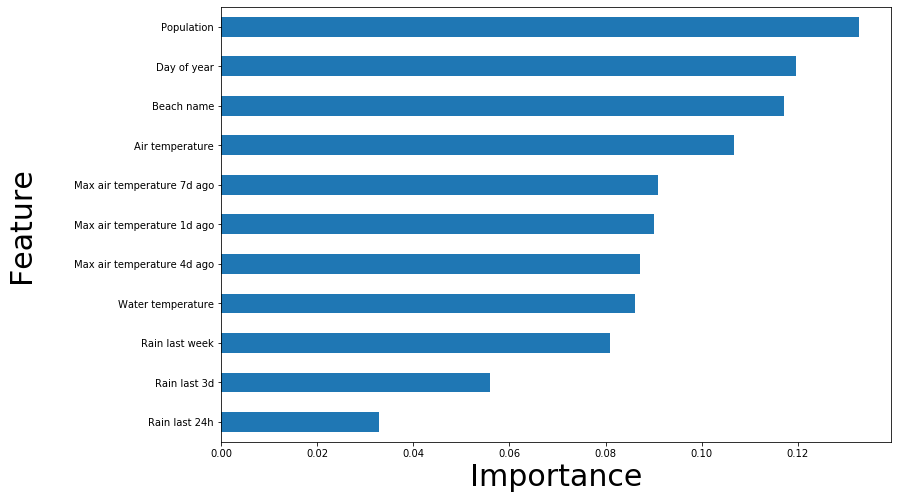

In [58]:
importances = m.feature_importances_
lst = ['Beach name','Water temperature','Air temperature','Rain last 24h','Rain last 3d','Rain last week', 'Day of year',
      'Max air temperature 1d ago', 'Max air temperature 4d ago','Max air temperature 7d ago',
      'Population']

for f in range(X.shape[1]):
    print( X.columns[f],importances[f] )
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.rcParams['figure.figsize']=(12,8)

feat_importances = pd.Series(m.feature_importances_, index = lst)
feat_importances.nsmallest(20).plot(kind='barh')
plt.xlabel('Importance', size = 30)
plt.ylabel('Feature\n', size = 30)

# 8. Baseline: Dummyclassifier

In [48]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = 'uniform')
dummy.fit(Xtrain,ytrain)

pred = dummy.predict(Xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.92      0.51      0.66     17267
           1       0.08      0.49      0.14      1546

    accuracy                           0.51     18813
   macro avg       0.50      0.50      0.40     18813
weighted avg       0.85      0.51      0.61     18813



# 9. Comparing models' performances

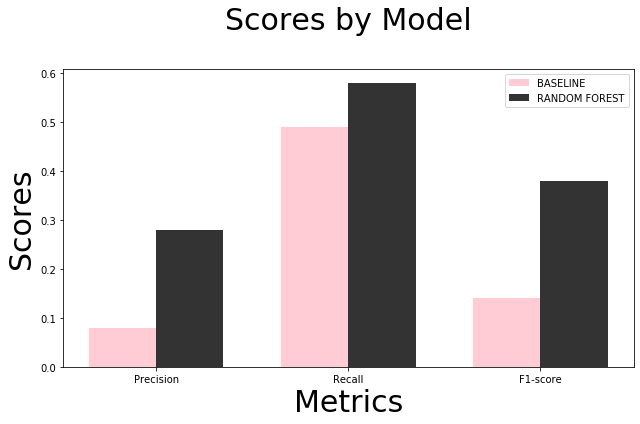

In [60]:
models = ['BASELINE', 'RANDOM FORESTS']

plt.rcParams['figure.figsize']=(9,6)


n_groups = 3
baseline = (0.08, 0.49, 0.14)
RF = (0.28, 0.58, 0.38)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, baseline, bar_width,
alpha=opacity,
color='pink',
label='BASELINE')

rects2 = plt.bar(index + bar_width, RF, bar_width,
alpha=opacity,
color='bLACK',
label='RANDOM FOREST')

plt.xlabel('Metrics',size = 30)
plt.ylabel('Scores',size=30)
plt.title('Scores by Model\n ',size =30)
plt.xticks(index + 0.5*bar_width, ('Precision', 'Recall', 'F1-score'))
plt.legend()

plt.tight_layout()
plt.show()

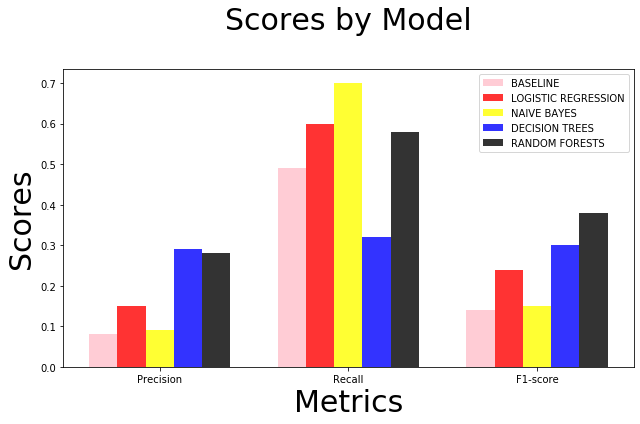

In [62]:
plt.rcParams['figure.figsize']=(9,6)

n_groups = 3
baseline = (0.08, 0.49, 0.14)
LR = (.15,.6,.24) 
NB = (.09,.7,.15)
DT = (.29,.32,.3)
RF = (0.28, 0.58, 0.38)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index+ bar_width, baseline, bar_width,
alpha=opacity,
color='pink',
label='BASELINE')

rects2 = plt.bar(index+ 2*bar_width, LR, bar_width,
alpha=opacity,
color='red',
label='LOGISTIC REGRESSION')

rects3 = plt.bar(index+ 3*bar_width, NB, bar_width,
alpha=opacity,
color='yellow',
label='NAIVE BAYES')

rects4 = plt.bar(index + 4*bar_width, DT, bar_width,
alpha=opacity,
color='b',
label='DECISION TREES')

rects5 = plt.bar(index + 5*bar_width, RF, bar_width,
alpha=opacity,
color='black',
label='RANDOM FORESTS')

plt.xlabel('Metrics',size = 30)
plt.ylabel('Scores',size=30)
plt.title('Scores by Model\n ',size =30)
plt.xticks(index + 3 *bar_width, ('Precision', 'Recall', 'F1-score'))
plt.legend()

plt.tight_layout()
plt.show()